In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [25]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

def random_(m=2**33, a=1245275837, c=54321):
    random_.current = (a * random_.current + c) % m
    return random_.current / m

# setting the seed
rng.current = 1
random_.current = 2


In [27]:
a=[rng() for i in range(10)]
b=[random_() for i in range(10)]
print(a,b)

[0.04194940160959959, 0.1948235605377704, 0.1386128985323012, 0.6840353596489877, 0.49171859584748745, 0.7676989699248224, 0.8828409514389932, 0.8232365751173347, 0.8835694054141641, 0.8901184604037553] [0.8097706615226343, 0.30564848030917346, 0.1447903289226815, 0.038703850004822016, 0.20988351351115853, 0.9601150660309941, 0.46806271688546985, 0.5380538292229176, 0.5366300438763574, 0.04748398042283952]


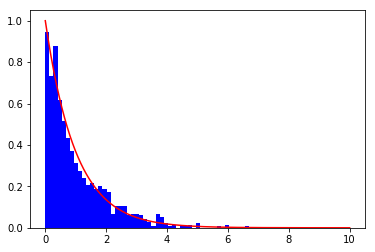

In [16]:
#1
def exp_df_inv(y, lamb):
    return -1/lamb*math.log(1-y)

lamb = 1
sample = [exp_df_inv(rng(), lamb) for i in range(1000)]
plt.hist(sample, color='blue', density=True, bins = 50)
plt.plot(np.linspace(0,10, 1000), lamb*np.exp(-lamb*np.linspace(0, 10, 1000)), color='red')
plt.show()

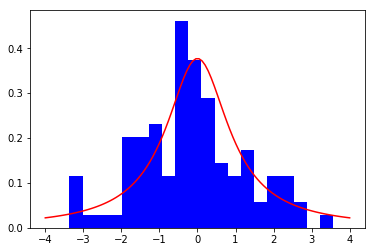

In [39]:
#2
from scipy import stats
def cauchy_density(x):
    return 1 / ((1 + x*x) * (2*np.arctan(4)))

dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
sample = []
while len(sample)<100:
    t = 8*(rng()-1/2)
    p = random_()
    if p<=cauchy_density(t):
        sample.append(t)
plt.hist(sample, bins=20, color='blue', density=True)
plt.plot(x, dist.pdf(x)*math.pi/(2*math.atan(4)), color='red')
plt.show()

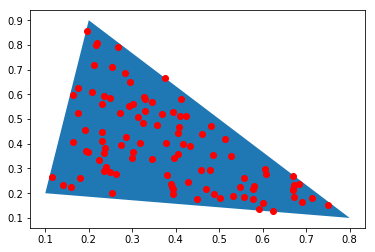

In [49]:
#3
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
x_sq=np.random.uniform(0,1,100)
y_sq=np.random.uniform(0,1,100)
z = x_sq+y_sq<=1
w = x_sq+y_sq>1
x_tr=z*(0.7*x_sq+0.1*y_sq+0.1)+w*(x_sq*(-0.1)+y_sq*(-0.7)+0.9)
y_tr=z*(x_sq*(-0.1)+y_sq*(0.7)+0.2)+w*(x_sq*(-0.7)+0.1*y_sq+0.8)
plt.scatter(x_tr,y_tr,color='red')
plt.show()

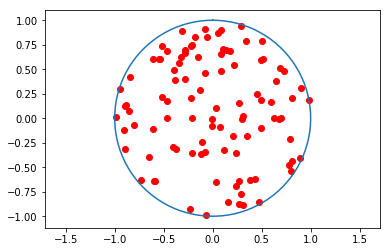

In [56]:
#4
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
r = np.random.uniform(0,1,100)
phi = np.random.uniform(0,2*np.pi, 100)
x = np.sqrt(r)*np.cos(phi)
y = np.sqrt(r)*np.sin(phi)
plt.scatter(x, y, color='red')
plt.show()

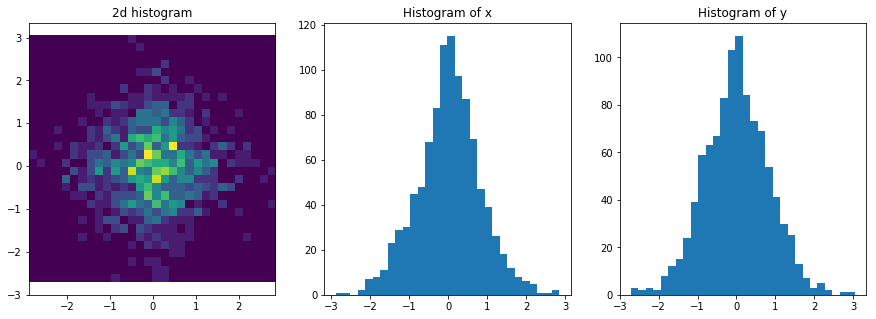

In [69]:
#5
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
a = np.random.uniform(0,1,1000)
b = 2*(np.random.binomial(1, 1/2, 1000)-1/2)*(1-a)
a = 2*(np.random.binomial(1, 1/2, 1000)-1/2)*a
theta = 2 * np.pi * u2
x = r * a
y = r * b
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()